# Introduction

Word count word clouds for all subjects

In [1]:
from pymongo import MongoClient
import pymongo

import re

import pandas as pd
import numpy as np

# sklearn
from sklearn.feature_extraction.text import CountVectorizer

import colorlover as cl

import math

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from PIL import Image

In [3]:
packages = (('Pymongo',pymongo), ('Regex', re), ('Re',re))

for package in packages:
    print('{0} version: {1}'.format(package[0],package[1].__version__))
    
!Python -V

Pymongo version: 3.2.2
Regex version: 2.2.1
Re version: 2.2.1
Python 3.6.4 :: Anaconda custom (64-bit)


# Get Subset of Data From Mongo

In [4]:
client = MongoClient(port=12345) # this is the port set by the SSH tunnel
db = client.research_papers
db.collection_names()

['cs_papers', 'math_papers', 'stat_papers']

In [75]:
topic_of_interest = 'stat'

databases = {'cs':db.cs_papers.find(), 'stat':db.stat_papers.find(), 'math':db.math_papers.find()}

# to pull all papers in the same area
stat_subj = re.compile(r'stat\.|math\.pr|math\.st')
math_subj = re.compile(r'math\.')
cs_subj = re.compile(r'cs\.')
topic_labels = {'cs':cs_subj, 'stat':stat_subj, 'math':math_subj}

all_papers = []

for topic in databases.keys():
    
    database = databases[topic]
    subset = 0
    
    current_paper = database

    for pape in current_paper:    

        subjects = pape['subject']
        
        in_topic = False
        topic = topic_labels[topic_of_interest]
        
        for subj in subjects:
            if re.search(topic, subj):
                in_topic = True
            
            
        if in_topic:
            article = pape['article']
            if article:
                if len(article) > 5000:
                    all_papers.append(pape)
                    subset+=1
                
print('There are a total of {0} articles.'.format(len(all_papers)))

There are a total of 932 articles.


# Cleaning!!

The word cid it the top word in all classes and seems to stand for random mathematical things, like: fractions, matrices, not equal to, and the box at the end of a proof to signify it is the end of the proof.  Because of this I will take it out of the set.

Also ligatures appear a lot in the translation, the following set was created from the Wikipedea page on ligatures.

In [76]:
ligatures = {'Ꜳ':'AA', 'ꜳ':'aa', 'Æ':'AE', 'æ':'ae', 'Ꜵ':'AO', 'ꜵ':'ao',
            'Ꜷ':'AU', 'ꜷ':'au', 'Ꜹ':'AV', 'ꜹ':'av', 'Ꜻ':'AV', 'ꜻ':'av',
            'Ꜽ':'AY', 'ꜽ':'ay', '🙰':'et', 'ﬀ':'ff', 'ﬃ':'ffi', 'ﬄ':'ffl', 
            'ﬁ':'fi', 'ﬂ':'fl', 'Œ':'OE', 'œ':'oe', 'Ꝏ':'OO', 'ꝏ':'oo', 
            'ﬆ':'st', 'Ꜩ':'TZ', 'ꜩ':'tz', 'ᵫ':'ue', 'Ꝡ':'VY', 'ꝡ':'vy'}

for lig in ligatures:
    re_lig = re.compile(lig)

    for pape in all_papers:
        pape['article'] = re.sub(re_lig, ligatures[lig], pape['article'])

In [77]:
re_cid = re.compile('cid')
et_al_cid = re.compile('et al')

for pape in all_papers:
    pape['article'] = re.sub(re_cid, ' ', pape['article'])
    pape['article'] = re.sub(et_al_cid, '', pape['article'])

In [78]:
all_text_combined = ''
for pape in all_papers:
    all_text_combined += pape['article']
    
all_text_combined = [all_text_combined]

# Topics Word Cloud

Thank you [Tiffany Moeller](https://github.com/TifMoe)

In [79]:
def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    r,g,b = 228,26,28
    
    prop = (1-0.5)*np.random.random()+0.5
    r = str(int(prop*r))
    g = str(int(prop*g))
    b = str(int(prop*b))
    return "rgb(" + r + "," + g + ", " + b + ")" 

In [72]:
colors = cl.scales['3']['qual']['Set1']
colors

['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)']

In [73]:
def generate_cloud(text):

    cloud_mask = np.array(Image.open('word_cloud_mask.jpg'))
    
    colors = cl.scales['3']['qual']['Set1']

    wordcloud = WordCloud(background_color="white",
                          max_words=100,
                          height=900,
                          width=1200,
                          relative_scaling=0,
                          color_func = random_color_func,
                          mask=cloud_mask
                         )

    wordcloud.generate(text)
    
    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

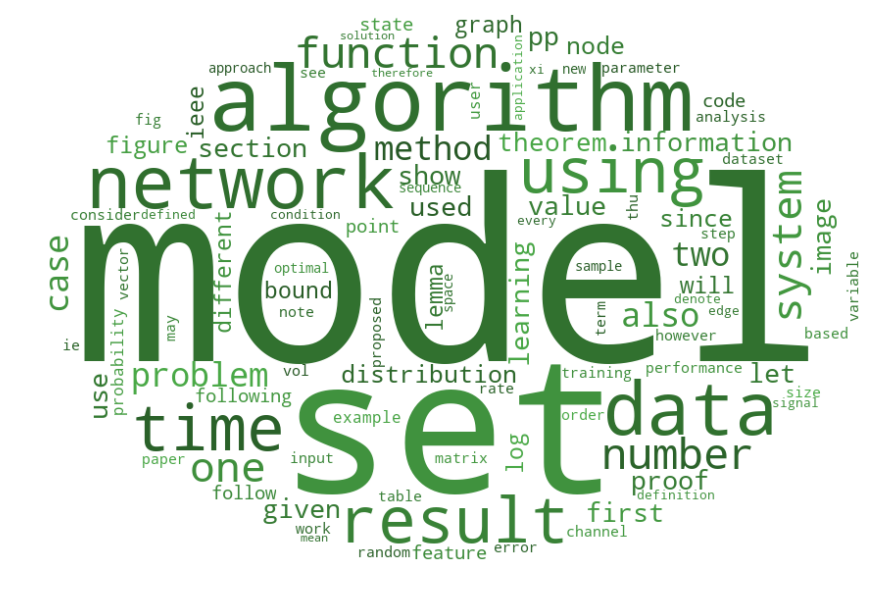

In [74]:
generate_cloud(all_text_combined[0])

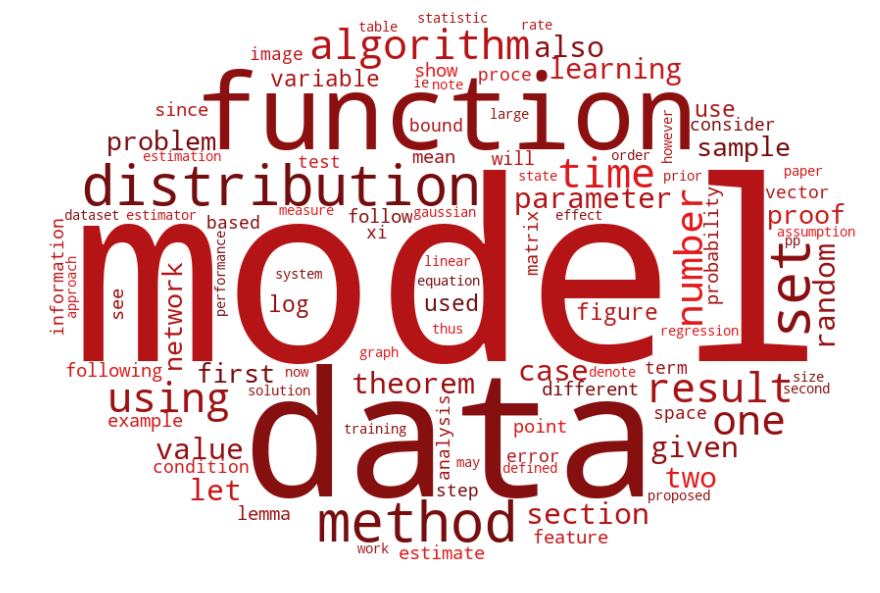

In [80]:
generate_cloud(all_text_combined[0])

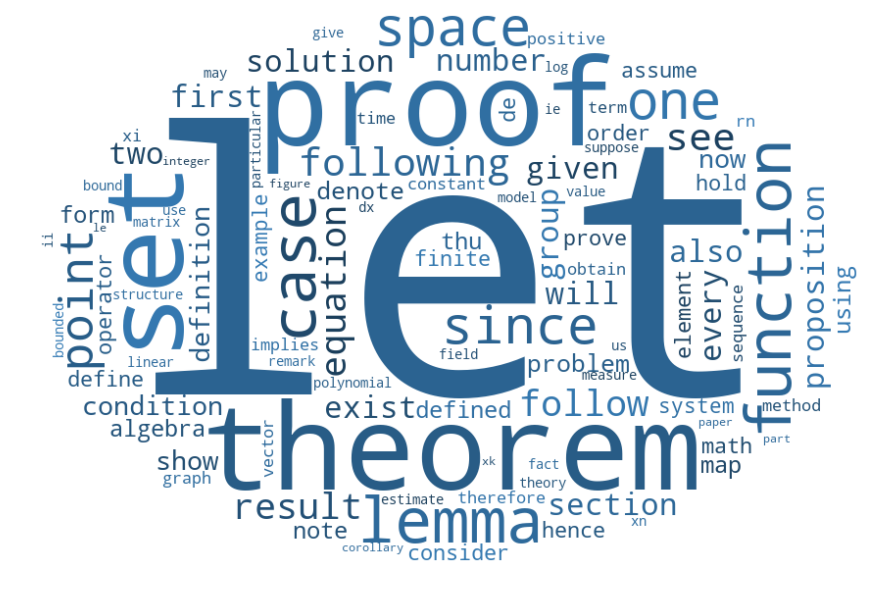

In [47]:
generate_cloud(all_text_combined[0])